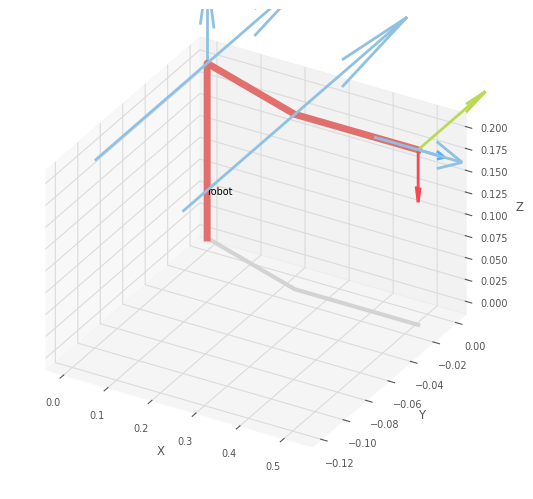

DHRobot: robot, 4 joints (RRRR), dynamics, modified DH parameters
┌──────┬────────┬───────────┬───────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │    θⱼ     │  dⱼ   │
├──────┼────────┼───────────┼───────┤
│  0.0 │   0.0° │        q1 │   0.2 │
│  0.0 │ -90.0° │  q2 - 90° │   0.0 │
│ 0.25 │   0.0° │  q3 + 90° │ -0.02 │
│  0.0 │  90.0° │        q4 │  0.28 │
└──────┴────────┴───────────┴───────┘

┌──┬──┐
└──┴──┘

   0.0007963  0         1         0.53      
   0         1         0        -0.02      
  -1         0         0.0007963  0.2004    
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [10]:
import roboticstoolbox as rtb
from math import atan2,sqrt,cos,sin,pi
import math
import numpy as np
from spatialmath import *

l1 = 0.2   # 200 / 1000
l2 = 0.06  # 60 / 1000
l3 = 0.25  # 250 / 1000
l4 = 0.1   # 100 / 1000
l5 = 0.28  # 280 / 1000

robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1), 
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02,offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2,d=l5) 
        
        
    ],
    name = "robot"    
)

#นำ config ที่คำนวณได้ไปพลอต
q = [0,1.57,0,0]
robot.plot(q)
print(robot)

T_0e = robot.fkine(q) 
print(T_0e) 

case 1: X <= l3 + l5
Inverse Kinematics did not converge to a solution.

case 2: Y <= l3 + l5
Inverse Kinematics did not converge to a solution.

case 3: Z <= l1 + l3 + l5
Inverse Kinematics did not converge to a solution.

case 4:  0.0009  <= x^2 + z^2 <= 0.2809
Inverse Kinematics did not converge to a solution.

Inverse Kinematics converge Solution:
[-0.13695534  0.01058346 -0.01058348  0.13695546]
Verification :
   1        -1.201e-07 -1.896e-08 -0.0001095  
   1.201e-07  1         2.613e-09 -0.02017   
   1.896e-08 -2.613e-09  1         0.73      
   0         0         0         1         



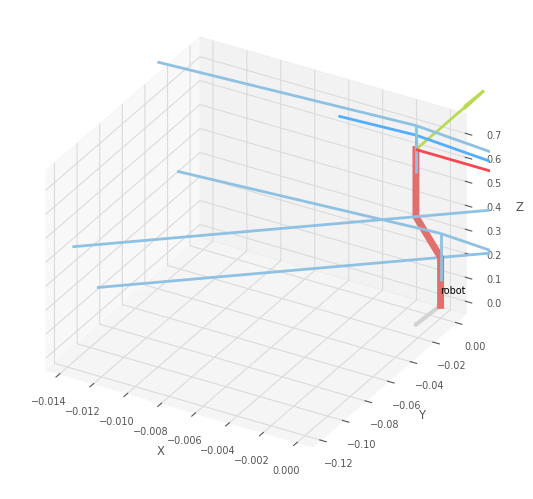

<Figure size 640x480 with 0 Axes>

In [158]:
import roboticstoolbox as rtb
from math import pi
import numpy as np
from spatialmath import SE3

l1 = 0.2    # 200 mm
l2 = 0.06   # 60 mm
l3 = 0.25   # 250 mm
l4 = 0.1    # 100 mm
l5 = 0.28   # 280 mm

robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=l1, alpha=0, offset=0), 
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),  
        rtb.RevoluteMDH(a=l3, d=-0.02, offset=pi/2), 
        rtb.RevoluteMDH(alpha=pi/2, d=l5, offset=0) 
    ],
    name="robot"    
)
q_initial = [0.970, 0.595, 1.411, 0]
T_0e = robot.fkine(q_initial)

'''for display'''
# robot.plot(q_initial)
# print("Forward Kinematics (T_0e):")
# print(T_0e)
# print(robot)

def ikine_find(desired_pose,s):
    solution = robot.ikine_LM(desired_pose)

    if solution.success:
        q_ik = solution.q
        print("Inverse Kinematics converge Solution:")
        print(q_ik)
        T_verification = robot.fkine(q_ik)
        print("Verification :")
        print(T_verification)
        robot.plot(q_ik)
    else:
        print(s)
        print("Inverse Kinematics did not converge to a solution.")
        print()
        
#case 1 X <= l3 + l5
ikine_find(SE3(l3+l5+1.0, -0.02, 0.73),'case 1: X <= l3 + l5')
#case 2 Y <= l3 + l5
ikine_find(SE3(0.0, l3+l5+1.0, 0.73),'case 2: Y <= l3 + l5')
#case 3 Z <= l1 + l3 + l5
ikine_find(SE3(0.0, -0.02, l1 + l3 + l5 + 1),'case 3: Z <= l1 + l3 + l5')
#case 4  0.0009  <= x^2 + z^2 <= 0.2809 
ikine_find(SE3(l3+l5+1.0, -0.02, 0.73),'case 4:  0.0009  <= x^2 + z^2 <= 0.2809')
#case 4 reachable
ikine_find(SE3(0.0, -0.02, 0.73),'case 4:')


Joint Velocities:
[ 7.154776 -0.172382  0.172382]
Manipulability: 0.0001953475371558325
[[ 0.02      0.528601  0.278601]
 [ 0.027953  0.        0.      ]
 [ 0.       -0.027953 -0.027953]] 

[[ 0.357438  0.000559 -0.022564]
 [ 0.000559  0.000781 -0.      ]
 [-0.022564 -0.        0.001563]] 


Eigenvalues:
[0.358864 0.000136 0.000782]

Eigenvectors:
[[ 0.998011  0.063017  0.001887]
 [ 0.001558 -0.05458   0.998508]
 [-0.063026  0.996519  0.054569]]


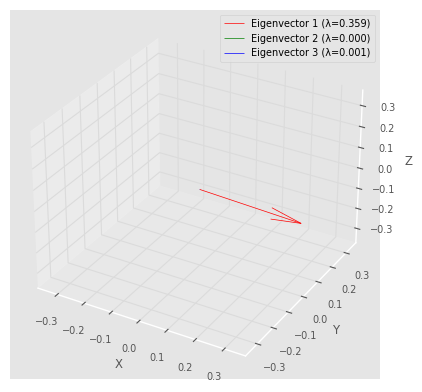

In [51]:
import roboticstoolbox as rtb
import numpy as np
from math import pi
from numpy.linalg import det
from numpy.linalg import eig
# Define your robot
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=0.2, alpha=0, offset=0),           # Joint 1
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),          # Joint 2
        rtb.RevoluteMDH(a=0.25, d=-0.02, offset=pi/2),       # Joint 3
        rtb.RevoluteMDH(alpha=pi/2, d=0.28, offset=0)        # Joint 4 (End-Effector)
    ],
    name="robot"
)

np.set_printoptions(precision=6, suppress=True)

q = [0, 0, 0, 0] 

J = robot.jacob0(q)
J_reduced = J[0:3, 0:-1]

delta_q = np.array([0.0, 0, 0, 0])

delta_x = J @ delta_q

initial_task_space = robot.fkine(q)
new_q = q + delta_q
new_task_space = robot.fkine(new_q)

J_inv = np.linalg.inv(J_reduced)
desired_velocities = np.array([0.1, 0.2, 0.0])

joint_velocities = J_inv @ desired_velocities
# print("\nInitial Task Space (End-Effector Pose):")
# print(initial_task_space)

# print("\nNew Task Space (End-Effector Pose) After Applying Delta q:")
# print(new_task_space)


print("Joint Velocities:")
print(joint_velocities)

manipulability = np.sqrt(det(J_reduced @ J_reduced.T))
print(f"Manipulability: {manipulability}")

print(J_reduced,'\n')

A = J_reduced @ J_reduced.T
print(A,'\n')

eigenvalues, eigenvectors = eig(A)

# Print the eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Plot the 3 eigenvectors in 3D space
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Extract eigenvectors (columns) and eigenvalues
# v1 = eigenvectors[:, 0] * eigenvalues[0]  # Scale by eigenvalue
# v2 = eigenvectors[:, 1] * eigenvalues[1]  # Scale by eigenvalue
# v3 = eigenvectors[:, 2] * eigenvalues[2]  # Scale by eigenvalue

# # Plot the eigenvectors, scaled by eigenvalues
# ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label=f'Eigenvector 1 (λ={eigenvalues[0]:.3f})')
# ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='g', label=f'Eigenvector 2 (λ={eigenvalues[1]:.3f})')
# ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='b', label=f'Eigenvector 3 (λ={eigenvalues[2]:.3f})')

# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Dynamically set the plot limits based on the scaled eigenvectors
# all_vectors = np.array([v1, v2, v3])
# max_limit = np.max(all_vectors)
# min_limit = np.min(all_vectors)

# # Set plot limits based on the largest magnitude of the vectors
# limit = max(abs(max_limit), abs(min_limit))
# ax.set_xlim([-limit, limit])
# ax.set_ylim([-limit, limit])
# ax.set_zlim([-limit, limit])

# # Add a legend
# ax.legend()

# # Show the plot
# plt.show()

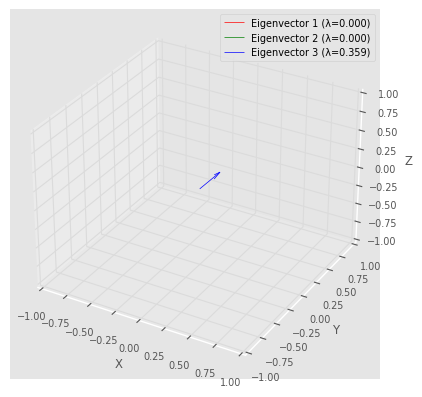

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the 3 eigenvectors in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract eigenvectors (columns) and eigenvalues
v1 = eigenvectors[:, 0] * eigenvalues[0]  # Scale by eigenvalue
v2 = eigenvectors[:, 1] * eigenvalues[1]  # Scale by eigenvalue
v3 = eigenvectors[:, 2] * eigenvalues[2]  # Scale by eigenvalue

# Plot the eigenvectors, scaled by eigenvalues
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label=f'Eigenvector 1 (λ={eigenvalues[0]:.3f})')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='g', label=f'Eigenvector 2 (λ={eigenvalues[1]:.3f})')
ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='b', label=f'Eigenvector 3 (λ={eigenvalues[2]:.3f})')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits for better visualization
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [26]:
B = np.array([[2, -1], 
              [-1, 1]])

eigenvaluesB, eigenvectorsB = eig(B)

print("\nEigenvalues:")
print(eigenvaluesB)

print("\nEigenvectors:")
print(eigenvectorsB)


Eigenvalues:
[2.618 0.382]

Eigenvectors:
[[ 0.8507  0.5257]
 [-0.5257  0.8507]]


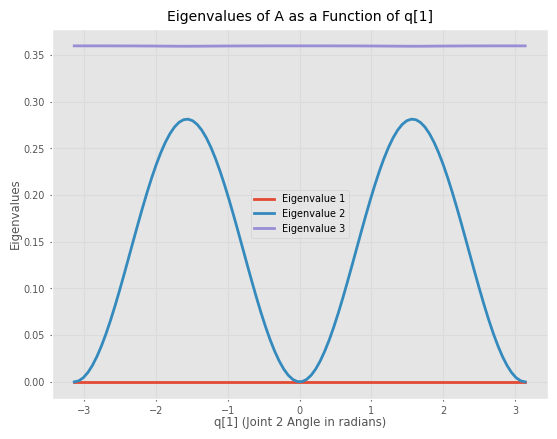

In [31]:
import matplotlib.pyplot as plt

# Prepare the range of q[1] values (from -π to π)
q1_values = np.linspace(-pi, pi, 100)


# Initialize lists to store eigenvalues
eigenvalue_1 = []
eigenvalue_2 = []
eigenvalue_3 = []

# Iterate over different q1 values
for q1 in q1_values:
    q = [0, q1, 0, 0]  # Vary only q[1]
    
    # Calculate the Jacobian at the current joint configuration
    J = robot.jacob0(q)
    J_reduced = J[0:3, 0:-1]  # Use the first 3 rows and columns (3x3 Jacobian)
    
    # Compute the manipulability matrix A
    A = J_reduced @ J_reduced.T
    
    # Compute the eigenvalues of matrix A
    eigenvalues, _ = eig(A)
    
    # Sort eigenvalues for consistency
    eigenvalues = np.sort(eigenvalues)
    
    # Store the eigenvalues in respective lists
    eigenvalue_1.append(eigenvalues[0])
    eigenvalue_2.append(eigenvalues[1])
    eigenvalue_3.append(eigenvalues[2])

# Convert lists to numpy arrays for plotting
eigenvalue_1 = np.array(eigenvalue_1)
eigenvalue_2 = np.array(eigenvalue_2)
eigenvalue_3 = np.array(eigenvalue_3)

# Plot the eigenvalues
plt.figure()
plt.plot(q1_values, eigenvalue_1, label='Eigenvalue 1',linewidth=2)
plt.plot(q1_values, eigenvalue_2, label='Eigenvalue 2',linewidth=2)
plt.plot(q1_values, eigenvalue_3, label='Eigenvalue 3',linewidth=2)

plt.xlabel("q[1] (Joint 2 Angle in radians)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of A as a Function of q[1]")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(q1_values, eigenvalue_1, label='Eigenvalue 1',linewidth=2)
plt.plot(q1_values, eigenvalue_2, label='Eigenvalue 2',linewidth=2)
plt.plot(q1_values, eigenvalue_3, label='Eigenvalue 3',linewidth=2)

plt.xlabel("q[1] (Joint 2 Angle in radians)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of A as a Function of q[1]")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(q1_values, eigenvalue_1, label='Eigenvalue 1',linewidth=2)
plt.plot(q1_values, eigenvalue_2, label='Eigenvalue 2',linewidth=2)
plt.plot(q1_values, eigenvalue_3, label='Eigenvalue 3',linewidth=2)

plt.xlabel("q[1] (Joint 2 Angle in radians)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of A as a Function of q[1]")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
import numpy as np
from math import pi
import roboticstoolbox as rtb

# Define your robot
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(d=0.2, alpha=0, offset=0),           # Joint 1
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),          # Joint 2
        rtb.RevoluteMDH(a=0.25, d=-0.02, offset=pi/2),       # Joint 3
        rtb.RevoluteMDH(alpha=pi/2, d=0.28, offset=0)        # Joint 4 (End-Effector)
    ],
    name="robot"
)

# Set joint ranges (example: -π to π for each joint)
q1_range = np.linspace(-pi, pi, 20)
q2_range = np.linspace(-pi, pi, 20)
q3_range = np.linspace(-pi, pi, 20)

# Initialize list to store singular configurations
singular_configurations = []

# Iterate over all joint combinations of q1, q2, and q3
for q1 in q1_range:
    for q2 in q2_range:
        for q3 in q3_range:
            q = [q1, q2, q3, 0]  # Set q4 to a fixed value (e.g., 0)
            
            # Calculate the Jacobian at the current joint configuration
            J = robot.jacob0(q)
            J_reduced = J[0:3, 0:3]  # Use the first 3x3 part of Jacobian
            
            # Compute the determinant of the Jacobian
            det_J = np.linalg.det(J_reduced)
            
            # Check for singularity (determinant close to zero)
            if abs(det_J) < 1e-6:  # Small threshold to account for numerical precision
                singular_configurations.append(q[:3])  # Store q1, q2, q3

# Print the singular configurations
print("Singular Configurations (q1, q2, q3):")
print(len(singular_configurations))
for config in singular_configurations:
    print(config)


Singular Configurations (q1, q2, q3):
800
[-3.141592653589793, -3.141592653589793, -3.141592653589793]
[-3.141592653589793, -3.141592653589793, 3.141592653589793]
[-3.141592653589793, -2.8108986900540254, -3.141592653589793]
[-3.141592653589793, -2.8108986900540254, 3.141592653589793]
[-3.141592653589793, -2.4802047265182576, -3.141592653589793]
[-3.141592653589793, -2.4802047265182576, 3.141592653589793]
[-3.141592653589793, -2.14951076298249, -3.141592653589793]
[-3.141592653589793, -2.14951076298249, 3.141592653589793]
[-3.141592653589793, -1.8188167994467224, -3.141592653589793]
[-3.141592653589793, -1.8188167994467224, 3.141592653589793]
[-3.141592653589793, -1.4881228359109546, -3.141592653589793]
[-3.141592653589793, -1.4881228359109546, 3.141592653589793]
[-3.141592653589793, -1.157428872375187, -3.141592653589793]
[-3.141592653589793, -1.157428872375187, 3.141592653589793]
[-3.141592653589793, -0.8267349088394194, -3.141592653589793]
[-3.141592653589793, -0.8267349088394194, 3

In [1]:
import numpy as np
from numpy.linalg import det, eig, inv

def is_safe(J_reduced, direction, eigenvalues, eigenvectors, threshold=0.001):
    # Project the unit direction onto the eigenvector basis
    projected_velocity = eigenvectors.T @ direction

    # Check if moving in this direction will cause any eigenvalue to fall below the threshold
    for i, eigenvalue in enumerate(eigenvalues):
        if eigenvalue + projected_velocity[i] < threshold:
            # Unsafe direction, return False
            return False
    
    # Safe direction, return True
    return True

# Example usage
eigenvalues, eigenvectors = eig(A)  # Get the eigenvalues and eigenvectors of A = J @ J.T

# Define the unit directions for each axis (x, y, z)
x_direction = np.array([1, 0, 0])
y_direction = np.array([0, 1, 0])
z_direction = np.array([0, 0, 1])

# Test each direction
safe_x = is_safe(J_reduced, x_direction, eigenvalues, eigenvectors)
safe_y = is_safe(J_reduced, y_direction, eigenvalues, eigenvectors)
safe_z = is_safe(J_reduced, z_direction, eigenvalues, eigenvectors)

# Decide which directions are safe
if safe_x:
    print("Safe to move in X direction")
else:
    print("X direction is unsafe")

if safe_y:
    print("Safe to move in Y direction")
else:
    print("Y direction is unsafe")

if safe_z:
    print("Safe to move in Z direction")
else:
    print("Z direction is unsafe")

# Now, only use the safe directions for your desired velocities
adjusted_velocities = np.array([0.0, 0.0, 0.0])
if safe_x:
    adjusted_velocities[0] = desired_velocities[0]
if safe_y:
    adjusted_velocities[1] = desired_velocities[1]
if safe_z:
    adjusted_velocities[2] = desired_velocities[2]

print("Adjusted Velocities (safe to move):", adjusted_velocities)

# Compute the joint velocities from the adjusted velocities
J_inv = inv(J_reduced)
joint_velocities = J_inv @ adjusted_velocities
print("Joint Velocities:", joint_velocities)


NameError: name 'A' is not defined